In [18]:
import numpy as np
import tomlkit
import pandas as pd
import yaml
from IPython.display import display
import importlib
import copy

import study_lib

In [ ]:
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt

In [8]:
importlib.reload(study_lib)
do_run = study_lib.do_run 
run_experiment = study_lib.run_experiment
config_series = study_lib.config_series

In [20]:
base_config_yaml = """
candidates: 5
voters: 13
considerations:
- Likability:
    mean: 0.5
- Irrational:
    sigma: 1.0
    camps: 0
    individualism_deg: 30
- Issues:
    - halfcsep: 0.0
      halfvsep: 0.0
      sigma: 1.0
methods:
- Plurality:
    strat: Honest
- Range:
    nranks: 10
    strat: Honest
- Range:
    nranks: 2
    strat: Honest
- Range:
    nranks: 2
    strat: Strategic
- InstantRunoff: {}
- Borda: {}
- Multivote:
    spread_fact: 1.0
    strat: Honest
    votes: 3
- STAR:
    strat: Honest
- STAR:
    strat: Strategic
    strategic_stretch_factor: 1.5
"""
config = yaml.safe_load(base_config_yaml)
base_config = copy.deepcopy(config)

In [10]:
config = yaml.safe_load(base_config_yaml)
df = run_experiment(
    config_series(config, 'voters', [7, 9, 11, 13, 15, 51]),
    trials=10000
)
df

,voters,pl_h_mR,range_10_h_mR,aprv_h_mR,aprv_s_mR,IRV_h_mR,Borda_h_mR,multi_h_3v_mR,star_6_h_mR,star_6_s_mR
0,7,0.115854,0.027922,0.059274,0.074724,0.114139,0.054221,0.088738,0.056212,0.070996
1,9,0.110866,0.024024,0.052792,0.064561,0.097447,0.046091,0.077513,0.050559,0.063709
2,11,0.106583,0.021897,0.049981,0.060064,0.088427,0.045170,0.071344,0.048145,0.060133
3,13,0.097078,0.021995,0.047604,0.055378,0.086757,0.038244,0.070203,0.041956,0.053942
4,15,0.092364,0.019479,0.046422,0.053692,0.074110,0.033903,0.059097,0.040937,0.051723
5,51,0.056643,0.008212,0.023809,0.026970,0.034187,0.016417,0.029750,0.018619,0.024661


More voters makes regrets lower

In [11]:
config = yaml.safe_load(base_config_yaml)
df = run_experiment(
    config_series(config, 'considerations.0.Likability.mean', [0., 0.5, 1.0, 4.0, 40.0]),
    trials=100000
)
df

,Likability,pl_h_mR,range_10_h_mR,aprv_h_mR,aprv_s_mR,IRV_h_mR,Borda_h_mR,multi_h_3v_mR,star_6_h_mR,star_6_s_mR
0,0.0,0.220880,0.043429,0.098861,0.117787,0.192337,0.082516,0.137856,0.090145,0.113463
1,0.5,0.100048,0.020461,0.047822,0.057948,0.088416,0.039331,0.068085,0.044358,0.056853
2,1.0,0.048170,0.010314,0.024420,0.029570,0.043002,0.019994,0.036897,0.023084,0.028918
3,4.0,0.006267,0.001265,0.005449,0.004552,0.005657,0.003269,0.012859,0.003134,0.004429
4,40.0,0.000096,0.000030,0.012461,0.000314,0.000103,0.000092,0.033812,0.000079,0.000086


Likability makes voting systems more nearly equivalent.

Not sure why multivoting doesn't do better than this though.

In [12]:
config['considerations'] = [
    {'Likability': {'mean': 1.0}},
]
df = run_experiment(
    config_series(config, 'considerations.0.Likability.mean', [0.5, 1.0, 4.0, 40.0]),
    trials=100000
)
df

,Likability,pl_h_mR,range_10_h_mR,aprv_h_mR,aprv_s_mR,IRV_h_mR,Borda_h_mR,multi_h_3v_mR,star_6_h_mR,star_6_s_mR
0,0.5,0.0,0.000025,0.017705,0.000494,0.0,0.0,0.045567,0.000111,0.000001
1,1.0,0.0,0.000019,0.018319,0.000606,0.0,0.0,0.046866,0.000133,0.000000
2,4.0,0.0,0.000016,0.017706,0.000603,0.0,0.0,0.045998,0.000111,0.000000
3,40.0,0.0,0.000023,0.018730,0.000600,0.0,0.0,0.046849,0.000099,0.000002


Above is a test of pure likability. This uncovered a serious bug. Likability originally wasn't adding to scores, it was overwriting them. I should design the code better, probably.

It makes sense that plurality, IRV, and Borda all give perfect scores. In this scenario, all voters have the same scores and issue the same ballots. Range, approval, multivoting, and star can all give ties.

In [13]:
config = yaml.safe_load(base_config_yaml)
df = run_experiment(
    config_series(config, 'considerations.1.Irrational.sigma', [0., 0.5, 2.0, 4.0, 40.0]),
    trials=100000
)
df

,Irrational,pl_h_mR,range_10_h_mR,aprv_h_mR,aprv_s_mR,IRV_h_mR,Borda_h_mR,multi_h_3v_mR,star_6_h_mR,star_6_s_mR
0,0.0,0.087075,0.025563,0.060921,0.059051,0.075783,0.054341,0.104899,0.044624,0.060495
1,0.5,0.075252,0.017189,0.035721,0.035293,0.060742,0.027909,0.051220,0.028182,0.035024
2,2.0,0.163383,0.032756,0.081508,0.101094,0.148169,0.064376,0.111737,0.075497,0.096254
3,4.0,0.234211,0.044520,0.110765,0.140762,0.212907,0.093229,0.153251,0.104688,0.133895
4,40.0,0.308546,0.053939,0.132584,0.179615,0.274101,0.121435,0.184892,0.128482,0.166419


Irrational voters make everything tougher.

In [17]:
config = yaml.safe_load(base_config_yaml)
config['considerations'] = config['considerations'][1:2]  # Irr only
df = run_experiment(
    config_series(config, 'considerations.0.Irrational.camps', [0, 2, 3, 4, 5]),
    trials=100000
)
df

,Irrational,pl_h_mR,range_10_h_mR,aprv_h_mR,aprv_s_mR,IRV_h_mR,Borda_h_mR,multi_h_3v_mR,star_6_h_mR,star_6_s_mR
0,0,0.309266,0.053664,0.130954,0.177164,0.274422,0.121337,0.183173,0.127971,0.164496
1,2,0.161232,0.020306,0.040291,0.054636,0.127640,0.036336,0.060962,0.044175,0.056300
2,3,0.174436,0.030043,0.059711,0.092080,0.149049,0.053240,0.086338,0.070601,0.088482
3,4,0.194950,0.035687,0.072624,0.102412,0.165207,0.063720,0.104255,0.079831,0.099902
4,5,0.211347,0.041245,0.084851,0.115862,0.184116,0.073521,0.118543,0.090102,0.111891


In [37]:
# Try something more politically-divided. Partly because this gives plurality fits. ;D
config = copy.deepcopy(base_config)
config['considerations'] = yaml.safe_load('''
- Likability:
    mean: 0.1
- Irrational:
    sigma: 0.25
    camps: 0
    individualism_deg: 30
- Issues:
    - halfcsep: 1.5
      halfvsep: 1.5
      sigma: 1.0
''')
df = run_experiment(
    config_series(config, 'considerations.2.Issues.0.sigma', [0, .25, 0.75, 1.0, 1.5, 2, 10]),
    trials=100000
)
df

,0,pl_h_mR,range_10_h_mR,aprv_h_mR,aprv_s_mR,IRV_h_mR,Borda_h_mR,multi_h_3v_mR,star_6_h_mR,star_6_s_mR
0,0.00,0.389588,0.028294,0.141976,0.068090,0.176824,0.107555,0.553912,0.054743,0.063504
1,0.25,0.403659,0.044244,0.157284,0.092570,0.235914,0.116685,0.414495,0.074651,0.085842
2,0.75,0.393295,0.057852,0.113374,0.081549,0.288444,0.100955,0.248929,0.067887,0.079603
3,1.00,0.348636,0.051608,0.102841,0.064642,0.255494,0.079929,0.213894,0.054435,0.062916
4,1.50,0.296712,0.044763,0.099169,0.052384,0.209886,0.060651,0.190806,0.042503,0.047860
5,2.00,0.280429,0.043230,0.102103,0.048485,0.198664,0.056158,0.190360,0.038827,0.042546
6,10.00,0.273823,0.042605,0.105285,0.035564,0.199041,0.048379,0.221675,0.028256,0.021989


In [55]:
# Have to do this as one experiment, since number of votes is part of the column name.
# Also it's more efficient this way.
config = copy.deepcopy(base_config)
config['considerations'] = yaml.safe_load('''
- Likability:
    mean: 0.1
- Irrational:
    sigma: 0.25
    camps: 0
    individualism_deg: 30
- Issues:
    - halfcsep: 1.5
      halfvsep: 1.5
      sigma: 1.0
''')
config['methods'].extend(yaml.safe_load('''
- Multivote:
    spread_fact: 1.0
    strat: Honest
    votes: 2
- Multivote:
    spread_fact: 1.0
    strat: Honest
    votes: 4
- RP:
    strat: Honest
'''))
config['methods'][1]['Range']['nranks'] = 5
df = run_experiment([config], trials=1000000, pi=True)
df

,config_num,pl_h_mR,pl_h_pi,range_5_h_mR,range_5_h_pi,aprv_h_mR,aprv_h_pi,aprv_s_mR,aprv_s_pi,IRV_h_mR,...,star_6_h_mR,star_6_h_pi,star_6_s_mR,star_6_s_pi,multi_h_2v_mR,multi_h_2v_pi,multi_h_4v_mR,multi_h_4v_pi,rp_h_mR,rp_h_pi
0,0,0.347411,55.215,0.053756,79.2923,0.10229,68.7845,0.064277,78.1721,0.253942,...,0.05363,80.4757,0.06177,78.7517,0.150032,64.6338,0.178052,64.1426,0.067677,78.0735


In [76]:
data = [
    ['Plurality', df.pl_h_mR[0]],
    ['IRV', df.IRV_h_mR[0]],
    ['Approval', df.aprv_h_mR[0]],
    ['Multi, 2', df.multi_h_2v_mR[0]],
    ['Multi, 3', df.multi_h_3v_mR[0]],
    ['Multi, 4', df.multi_h_4v_mR[0]],
    ['Borda', df.Borda_h_mR[0]],
    ['Score 1-5', df.range_5_h_mR[0]],
    # ['STAR', df.star_6_h_mR[0]],
    ['Ranked Pairs', df.rp_h_mR[0]],
]
data_x = [p[0] for p in data]
data_y = [(1.0 - p[1]) * 100. for p in data]

[<BarContainer object of 1 artists>, <BarContainer object of 1 artists>, <BarContainer object of 1 artists>, <BarContainer object of 1 artists>, <BarContainer object of 1 artists>, <BarContainer object of 1 artists>, <BarContainer object of 1 artists>, <BarContainer object of 1 artists>, <BarContainer object of 1 artists>]


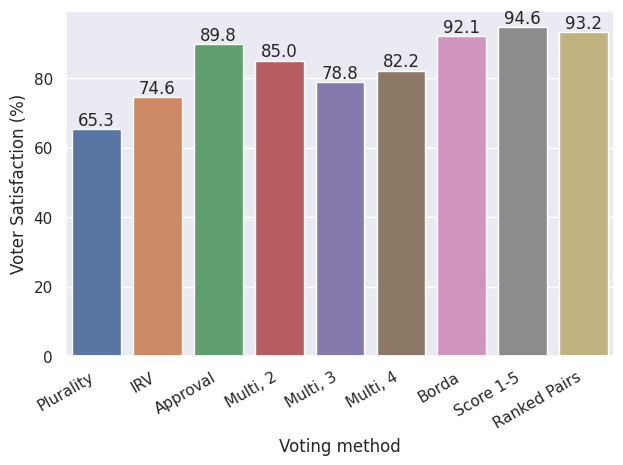

In [77]:
ax = sns.barplot(x=data_x, y=data_y, errorbar=None, hue=data_x, legend=False)
plt.xlabel('Voting method')
plt.ylabel('Voter Satisfaction (%)')
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
print(ax.containers)
for i in range(len(data_x)):
    ax.containers[i].datavalues = np.array([55.1]) # float(f'{data_y[i]:.1f}')])
    ax.bar_label(ax.containers[i], fmt='{:.1f}')

I think the plot above is the "money plot." For my particular group, I was considering either approval or multivoting with two or three votes.

* Plurality is just there for reference.
* IRV is about equivalent to what was done before, without the "instant" part.
* Approval is my recommendation on the basis of this study.
* With multivoting, it's hard to know how much to spread your votes.
* Multivoting-4, Borda, Score, and Ranked Pairs are also for reference, not seriously considered.

In this small group, strategic voting is not really a concern so Borda is an option, except that this is a small group of friends voting on friends. It is awkward to divulge too much preference in one ballot. So scoring and complete ranking ballots are not options, again just in my own use case at the moment.

Also in my case, extreme simplicity is needed. That eliminates ranked pairs and IRV. Even score voting and Borda are a stretch because the counting is done by hand.

Now I could try partial Borda -- list top N (N=2 probably) only. Also provide an offset, so for N=2, top choice gets 2 pts plus offset, next one gets 1 plus offset.

[<BarContainer object of 1 artists>, <BarContainer object of 1 artists>, <BarContainer object of 1 artists>, <BarContainer object of 1 artists>, <BarContainer object of 1 artists>, <BarContainer object of 1 artists>, <BarContainer object of 1 artists>, <BarContainer object of 1 artists>, <BarContainer object of 1 artists>]


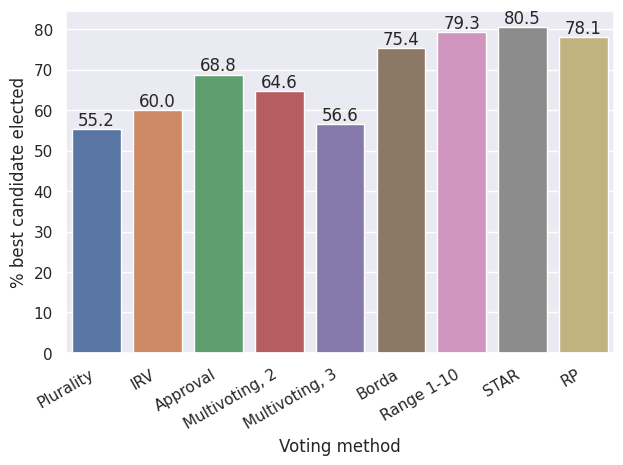

In [79]:
data = [
    ['Plurality', df.pl_h_pi[0]],
    ['IRV', df.IRV_h_pi[0]],
    ['Approval', df.aprv_h_pi[0]],
    ['Multivoting, 2', df.multi_h_2v_pi[0]],
    ['Multivoting, 3', df.multi_h_3v_pi[0]],
    ['Borda', df.Borda_h_pi[0]],
    ['Range 1-10', df.range_5_h_pi[0]],
    ['STAR', df.star_6_h_pi[0]],
    ['RP', df.rp_h_pi[0]],
]
data_x = [p[0] for p in data]
data_y = [p[1] for p in data]
ax = sns.barplot(x=data_x, y=data_y, errorbar=None, hue=data_x, legend=False)
plt.xlabel('Voting method')
plt.ylabel('% best candidate elected')
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
print(ax.containers)
for i in range(len(data_x)):
    ax.bar_label(ax.containers[i], fmt='{:.1f}')